In [297]:
%matplotlib inline

def precision(pred, gold):
    return float(len(pred & gold)) / len(pred)
def recall(pred, gold):
    return float(len(pred & gold)) / len(gold)
def f1(pred, gold):
    return 2 / ((1/precision(pred, gold)) + (1/recall(pred, gold)))
def scores(pred, gold):
    return precision(pred, gold), recall(pred, gold), f1(pred, gold)

def best(t, col, filt=True):
    return (t.groupby(['row'])[col].transform(max) == t[col]) & filt

def pred_set(t, selection):
    return set((r.row, r.entity) for r in t[selection].itertuples())

def pred_scores(t, col, filt=True):
    return scores(pred_set(t, best(t, col, filt=filt)), pred_set(t, (t.gold==1)))


import pandas as pd
import numpy as np

t = pd.read_csv('./data/ppr_v0.tsv', sep='\t')
# t = t[(t['-log(ppr)'] != 0) & (t['strsim'] != 0)]

def show(n):
    p = t[n][ (t['strsim']!=0) ]
    print( p.describe() )
    print( 'mode %10.6f' % list(p.mode())[0] )
#     print('%10s P/R/F1: %.2f / %.2f / %.2f' % (n, *pred_scores(t, n)) )
    print('%10s P/R/F1: %.2f / %.2f / %.2f' % (n, *pred_scores(t, n, filt=(t['strsim']!=0) )) )
    
    return p.plot.density(xlim=(min(p),max(p)))

t[['row','strsim','-log(ppr)']].groupby(['row']).agg(['mean', 'median', 'std','count']).head()

strsim                           \
                                               mean   median       std count   
row                                                                            
10630177_0_4831842476649004753.csv~Row0    0.558333  0.45000  0.302307     4   
10630177_0_4831842476649004753.csv~Row1    0.259156  0.25000  0.043073    26   
10630177_0_4831842476649004753.csv~Row10   0.347552  0.28571  0.164598     6   
10630177_0_4831842476649004753.csv~Row100  0.350000  0.30000  0.191485     4   
10630177_0_4831842476649004753.csv~Row101  0.333333  0.30000  0.152753     3   

                                           -log(ppr)                       \
                                                mean     median       std   
row                                                                         
10630177_0_4831842476649004753.csv~Row0    15.498976  15.611816  0.470791   
10630177_0_4831842476649004753.csv~Row1    15.838446  15.887036  0.533294   
10630177_0_4831842476649004753.csv~Row10   15.548508  15.609394  0.303224   
10630177_0_4831842476649004753.csv~Row100  15.360762  15.616894  0.800468   
10630177_0_4831842476649004753.csv~Row101  16.053218  16.125755  0.177182   

                                                 
                                          count  
row                                              
10630177_0_4831842476649004753.csv~Row0       4  
10630177_0_4831842476649004753.csv~Row1      26  
10630177_0_4831842476649004753.csv~Row10      6  
10630177_0_4831842476649004753.csv~Row100     4  
10630177_0_4831842476649004753.csv~Row101     3

In [275]:
# strsim and ppr 0 are the same
print(sum((t['-log(ppr)'] == 0)), sum((t['-log(ppr)'] == 0)) )
sum((t['-log(ppr)'] == 0) & (t['strsim'] != 0)), sum((t['-log(ppr)'] != 0) & (t['strsim'] == 0))

1379 1379


(0, 0)

# The Classics

count    139094.000000
mean          0.497576
std           0.240125
min           0.200000
25%           0.333330
50%           0.500000
75%           0.600000
max           1.000000
Name: strsim, dtype: float64
mode   0.500000
    strsim P/R/F1: 0.40 / 0.87 / 0.55
nonzero     strsim P/R/F1: 0.40 / 0.86 / 0.55


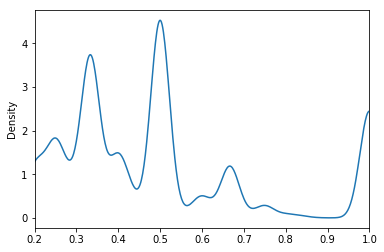

In [256]:
show('strsim')

count    139094.000000
mean         15.361797
std           0.840787
min           6.038329
25%          15.135953
50%          15.490471
75%          15.788850
max          16.974892
Name: -log(ppr), dtype: float64
mode  16.452781
 -log(ppr) P/R/F1: 0.12 / 0.14 / 0.13
nonzero  -log(ppr) P/R/F1: 0.11 / 0.13 / 0.12


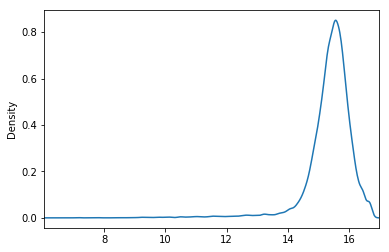

In [257]:
show('-log(ppr)')

count    139094.000000
mean          0.032725
std           0.016905
min           0.011821
25%           0.021289
50%           0.030767
75%           0.038080
max           0.165609
Name: strsim / -log(ppr), dtype: float64
mode   0.016011
strsim / -log(ppr) P/R/F1: 0.74 / 0.80 / 0.77
nonzero strsim / -log(ppr) P/R/F1: 0.74 / 0.80 / 0.77


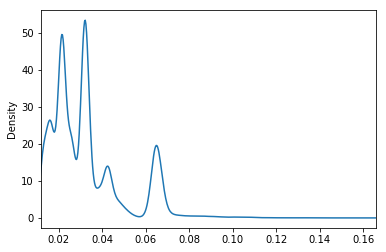

In [258]:
t['strsim / -log(ppr)'] = t['strsim'] / t['-log(ppr)']
show('strsim / -log(ppr)')

# The Explanation

count    139094.000000
mean          0.065353
std           0.004817
min           0.058911
25%           0.063336
50%           0.064556
75%           0.066068
max           0.165609
Name: 1/-log(ppr), dtype: float64
mode   0.060780
1/-log(ppr) P/R/F1: 0.47 / 0.52 / 0.50
nonzero 1/-log(ppr) P/R/F1: 0.41 / 0.41 / 0.41


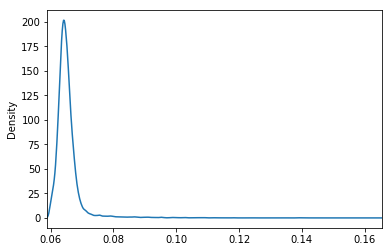

In [259]:
# Switch PPR around for better scores
t['1/-log(ppr)'] = 1/t['-log(ppr)']
show('1/-log(ppr)')

count    139094.000000
mean          0.394620
std           0.029089
min           0.355721
25%           0.382443
50%           0.389809
75%           0.398939
max           1.000000
Name: norm(1/-log(ppr)), dtype: float64
mode   0.367010
norm(1/-log(ppr)) P/R/F1: 0.47 / 0.52 / 0.50
nonzero norm(1/-log(ppr)) P/R/F1: 0.41 / 0.41 / 0.41


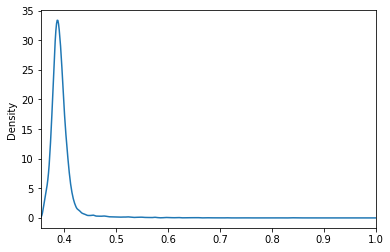

In [260]:
# Let's NORMALIZE
t['norm(1/-log(ppr))'] = (1/t['-log(ppr)'] / max(1/t['-log(ppr)'][t.strsim!=0]))
show('norm(1/-log(ppr))')

count    139094.000000
mean          0.197605
std           0.102076
min           0.071377
25%           0.128549
50%           0.185781
75%           0.229940
max           1.000000
Name: strsim * norm(1/-log(ppr)), dtype: float64
mode   0.096679
strsim * norm(1/-log(ppr)) P/R/F1: 0.74 / 0.80 / 0.77
nonzero strsim * norm(1/-log(ppr)) P/R/F1: 0.74 / 0.80 / 0.77


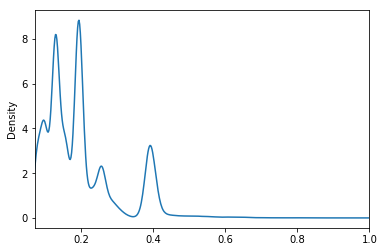

In [261]:
# And COMBINE
t['strsim * norm(1/-log(ppr))'] = t['strsim'] * (1/t['-log(ppr)'] / max(1/t['-log(ppr)'][t.strsim!=0]))
show('strsim * norm(1/-log(ppr))')

# The break-down

count    1.390940e+05
mean     1.273423e-06
std      2.387798e-05
min      4.245201e-08
25%      1.389920e-07
50%      1.873155e-07
75%      2.670170e-07
max      2.385542e-03
Name: ppr, dtype: float64
mode   0.000000
       ppr P/R/F1: 0.47 / 0.52 / 0.50
nonzero        ppr P/R/F1: 0.41 / 0.41 / 0.41


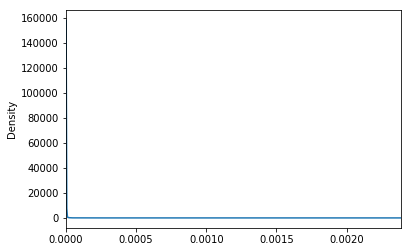

In [262]:
# Bare PPR gets same score as -log(ppr)
t['ppr'] = np.exp(-t['-log(ppr)'])
show('ppr')

count    1.390940e+05
mean     1.037889e-06
std      2.296018e-05
min      8.974377e-09
25%      5.351604e-08
50%      8.241189e-08
75%      1.394110e-07
max      2.385542e-03
Name: strsim * ppr, dtype: float64
mode   0.000000
strsim * ppr P/R/F1: 0.61 / 0.67 / 0.64
nonzero strsim * ppr P/R/F1: 0.61 / 0.66 / 0.63


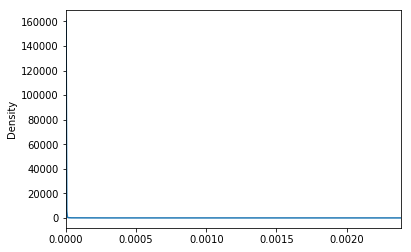

In [263]:
# But combined with strsim it's not as good
t['strsim * ppr'] = t['strsim'] * np.exp(-t['-log(ppr)'])
show('strsim * ppr')

count    139094.000000
mean          0.755767
std           0.130960
min           0.000000
25%           0.694572
50%           0.773366
75%           0.841014
max           0.999982
Name: 1-norm(1/ppr), dtype: float64
mode   0.406733
1-norm(1/ppr) P/R/F1: 0.47 / 0.52 / 0.50
nonzero 1-norm(1/ppr) P/R/F1: 0.41 / 0.41 / 0.41


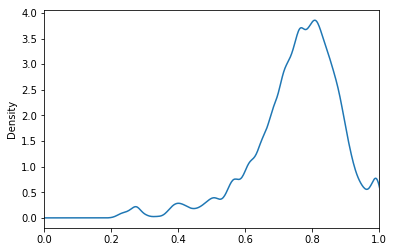

In [264]:
# Rescaled PPR looks good
t['1-norm(1/ppr)'] = 1 - (1/np.exp(-t['-log(ppr)']) / max(1/np.exp(-t['-log(ppr)'])))
show('1-norm(1/ppr)')

count    139094.000000
mean          0.379614
std           0.207613
min           0.000000
25%           0.237230
50%           0.325183
75%           0.444881
max           0.999982
Name: strsim * 1-norm(1/ppr), dtype: float64
mode   0.185863
strsim * 1-norm(1/ppr) P/R/F1: 0.74 / 0.81 / 0.77
nonzero strsim * 1-norm(1/ppr) P/R/F1: 0.74 / 0.80 / 0.77


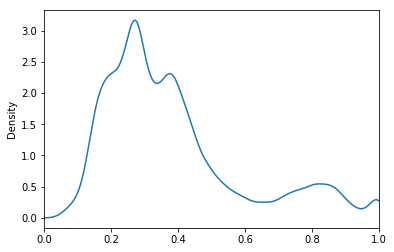

In [265]:
# And it's OK! But not better.
t['strsim * 1-norm(1/ppr)'] = t['strsim'] * (1 - (1/np.exp(-t['-log(ppr)']) / max(1/np.exp(-t['-log(ppr)']))))
show('strsim * 1-norm(1/ppr)')

# A summary

Index(['row', 'entity', 'strsim', '-log(ppr)', 'pred', 'gold', 'in_kb',
       'strsim / -log(ppr)', '1/-log(ppr)', 'norm(1/-log(ppr))',
       'strsim * norm(1/-log(ppr))', 'ppr', 'strsim * ppr', '1-norm(1/ppr)',
       'strsim * 1-norm(1/ppr)', '1-norm(1/ppr) ** 2'],
      dtype='object')


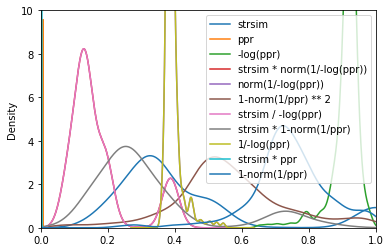

In [271]:
print(t.columns)
cols = list(set(t.columns)-set(['row','entity','in_kb','gold','pred']))
(t[cols][t.strsim!=0]/t[cols][t.strsim!=0].max()).head(1000).plot.density(xlim=(0,1), ylim=(0,10))

# An analysis of scales

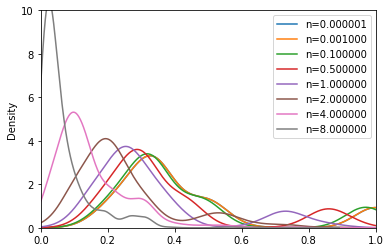

In [290]:
norm_ppr = 1 - (1/np.exp(-t['-log(ppr)']) / max(1/np.exp(-t['-log(ppr)'])))
s = pd.DataFrame({
    'n=%2f'%n: t['strsim'] * (norm_ppr[t.strsim!=0]**n) for n in [0.000001, 0.001, 0.1, 0.5,1,2,4,8]
})
s['row'] = t.row
s['entity'] = t.entity
s = s[t.strsim!=0]
s.head(1000).plot.density(xlim=(0,1), ylim=(0,10))

In [291]:
for col in [c for c in s.columns if c[0]=='n']:
    p,r,f = scores(pred_set(s, best(s, col)), pred_set(t, (t.gold==1)))
    print('%10s P/R/F1: %.2f / %.2f / %.2f' % (col, p,r,f) )

n=0.000001 P/R/F1: 0.74 / 0.80 / 0.77
n=0.001000 P/R/F1: 0.74 / 0.80 / 0.77
n=0.100000 P/R/F1: 0.74 / 0.80 / 0.77
n=0.500000 P/R/F1: 0.74 / 0.80 / 0.77
n=1.000000 P/R/F1: 0.74 / 0.80 / 0.77
n=2.000000 P/R/F1: 0.73 / 0.79 / 0.76
n=4.000000 P/R/F1: 0.69 / 0.75 / 0.72
n=8.000000 P/R/F1: 0.59 / 0.64 / 0.61
